<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB
None
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0

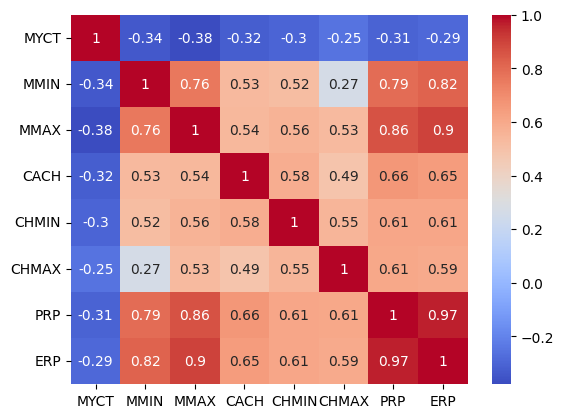

최적의 모델: Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('regressor', Ridge(alpha=10))])
최적의 하이퍼파라미터: {'poly__degree': 2, 'regressor': Ridge(), 'regressor__alpha': 10}
교차 검증 R^2 점수: [0.81848717 0.69762672 0.29059501 0.82902217 0.85956607]
평균 교차 검증 R^2 점수: 0.6990594293390415


C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWa

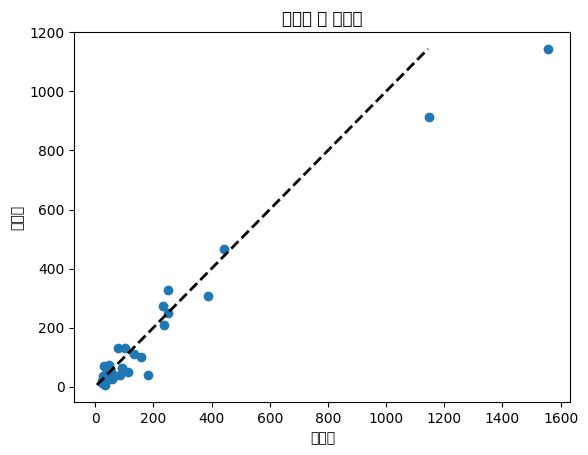

C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\나동휘\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


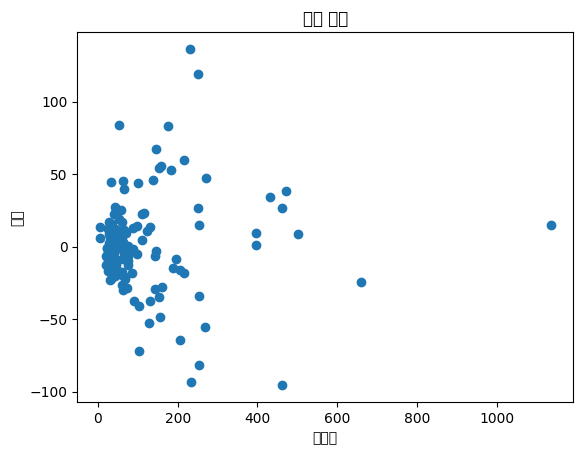


Linear Regression 모델 평가
Training MSE: 3117.658905430178
Training MAE: 35.12200634651681
Training R^2: 0.8378284557995717
Testing MSE: 5633.06815579327
Testing MAE: 48.068801347004765
Testing R^2: 0.8893455830696771
Cross-validation R^2 scores: [0.63828223 0.44329768 0.45334519 0.85890627 0.86028105]
Mean Cross-validation R^2 score: 0.6508224821731211

최적의 모델 평가
Training MSE: 905.6495309753949
Training MAE: 19.713157448636448
Training R^2: 0.9528907467436987
Testing MSE: 6659.426776336181
Testing MAE: 39.54412735095119
Testing R^2: 0.8691840811001359
Cross-validation R^2 scores: [0.81848717 0.69762672 0.29059501 0.82902217 0.85956607]
Mean Cross-validation R^2 score: 0.6990594293390415


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# 데이터 로드
data = pd.read_csv('machine_data.csv')

# 데이터 정보 출력
print(data.info())
print(data.describe())
print(data.head())

numeric_data = data.select_dtypes(include=[np.number])

# 상관관계 행렬 시각화
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

X = data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]]
y = data["PRP"]

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 파이프라인 구성
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # 표준화
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # 다항식 특징 추가
    ('regressor', LinearRegression())  # 회귀 모델
])

# 하이퍼파라미터 그리드 설정
param_grid = [
    {
        'poly__degree': [1, 2],
        'regressor': [Ridge()],
        'regressor__alpha': [0.01, 0.1, 1, 10]
    },
    {
        'poly__degree': [1, 2],
        'regressor': [Lasso(max_iter=10000)],
        'regressor__alpha': [0.01, 0.1, 1, 10]
    },
    {
        'poly__degree': [1, 2],
        'regressor': [LinearRegression()]
    }
]

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# 최적의 모델과 하이퍼파라미터 출력
print("최적의 모델:", grid_search.best_estimator_)
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
train_pred = grid_search.predict(X_train)
test_pred = grid_search.predict(X_test)

# 교차 검증 점수 확인
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='r2')
print("교차 검증 R^2 점수:", cv_scores)
print("평균 교차 검증 R^2 점수:", np.mean(cv_scores))

# 예측 결과 시각화
plt.scatter(test_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.title("예측값 대 실제값")
plt.show()

# 잔차 플롯
plt.scatter(train_pred, y_train - train_pred)
plt.xlabel("예측값")
plt.ylabel("잔차")
plt.title("잔차 플롯")
plt.show()

# 모델 성능 평가 함수
def evaluate_model(model, X_train, X_test, y_train, y_test, cv=5):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_r2 = r2_score(y_train, train_pred)
    
    test_mse = mean_squared_error(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    mean_cv_score = np.mean(cv_scores)
    
    print(f"Training MSE: {train_mse}")
    print(f"Training MAE: {train_mae}")
    print(f"Training R^2: {train_r2}")
    print(f"Testing MSE: {test_mse}")
    print(f"Testing MAE: {test_mae}")
    print(f"Testing R^2: {test_r2}")
    print(f"Cross-validation R^2 scores: {cv_scores}")
    print(f"Mean Cross-validation R^2 score: {mean_cv_score}")
    
    return {
        "Train MSE": train_mse,
        "Train MAE": train_mae,
        "Train R^2": train_r2,
        "Test MSE": test_mse,
        "Test MAE": test_mae,
        "Test R^2": test_r2,
        "CV R^2": cv_scores,
        "Mean CV R^2": mean_cv_score
    }

# Linear Regression 모델 평가
print("\nLinear Regression 모델 평가")
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_results = evaluate_model(lr, X_train, X_test, y_train, y_test)

# 최적의 모델 평가
print("\n최적의 모델 평가")
best_model_results = evaluate_model(grid_search.best_estimator_, X_train, X_test, y_train, y_test)

In [12]:
# 학습 데이터 성능 평가
train_mse = mean_squared_error(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

print("학습 데이터 성능 평가:")
print("MSE:", train_mse)
print("MAE:", train_mae)
print("R^2:", train_r2)

# 테스트 데이터 성능 평가
test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print("테스트 데이터 성능 평가:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R^2:", test_r2)

# 교차 검증 결과
print("교차 검증 R^2 점수:", cv_scores)
print("평균 교차 검증 R^2 점수:", np.mean(cv_scores))


학습 데이터 성능 평가:
MSE: 905.6495309753949
MAE: 19.713157448636448
R^2: 0.9528907467436987
테스트 데이터 성능 평가:
MSE: 6659.426776336181
MAE: 39.54412735095119
R^2: 0.8691840811001359
교차 검증 R^2 점수: [0.81848717 0.69762672 0.29059501 0.82902217 0.85956607]
평균 교차 검증 R^2 점수: 0.6990594293390415


In [13]:
# 앙상블 학습을 위한 모델 추가
voting_regressor = VotingRegressor([
    ('ridge', Ridge(alpha=grid_search.best_params_['regressor__alpha'])),
    ('lasso', Lasso(alpha=grid_search.best_params_['regressor__alpha'], max_iter=10000)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 앙상블 모델로 파이프라인 설정
ensemble_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ensemble', voting_regressor)
])

# 앙상블 모델 학습
ensemble_pipeline.fit(X_train, y_train)

# 성능 평가
ensemble_pred = ensemble_pipeline.predict(X_test)
ensemble_r2 = r2_score(y_test, ensemble_pred)

print("앙상블 모델 테스트 데이터 R^2:", ensemble_r2)
print("앙상블 모델 테스트 데이터 MSE:", mean_squared_error(y_test, ensemble_pred))
print("앙상블 모델 테스트 데이터 MAE:", mean_absolute_error(y_test, ensemble_pred))

if ensemble_r2 > 0.85:
    print("앙상블 모델이 R^2 85% 이상을 달성했습니다.")
else:
    print("앙상블 모델이 R^2 85%를 달성하지 못했습니다.")


앙상블 모델 테스트 데이터 R^2: 0.9667963860427109
앙상블 모델 테스트 데이터 MSE: 1690.2915005899222
앙상블 모델 테스트 데이터 MAE: 29.142972247398934
앙상블 모델이 R^2 85% 이상을 달성했습니다.


               Model             Data          MSE        MAE       R^2
0  Linear Regression            Train  3117.658905  35.122006  0.837828
1  Linear Regression             Test  5633.068156  48.068801  0.889346
2     Best_estimator            Train   905.649531  19.713157  0.952891
3     Best_estimator             Test  6659.426776  39.544127  0.869184
4  Linear Regression  CrossValidation     0.650822   0.650822  0.650822
5     Best_estimator  CrossValidation     0.699059   0.699059  0.699059


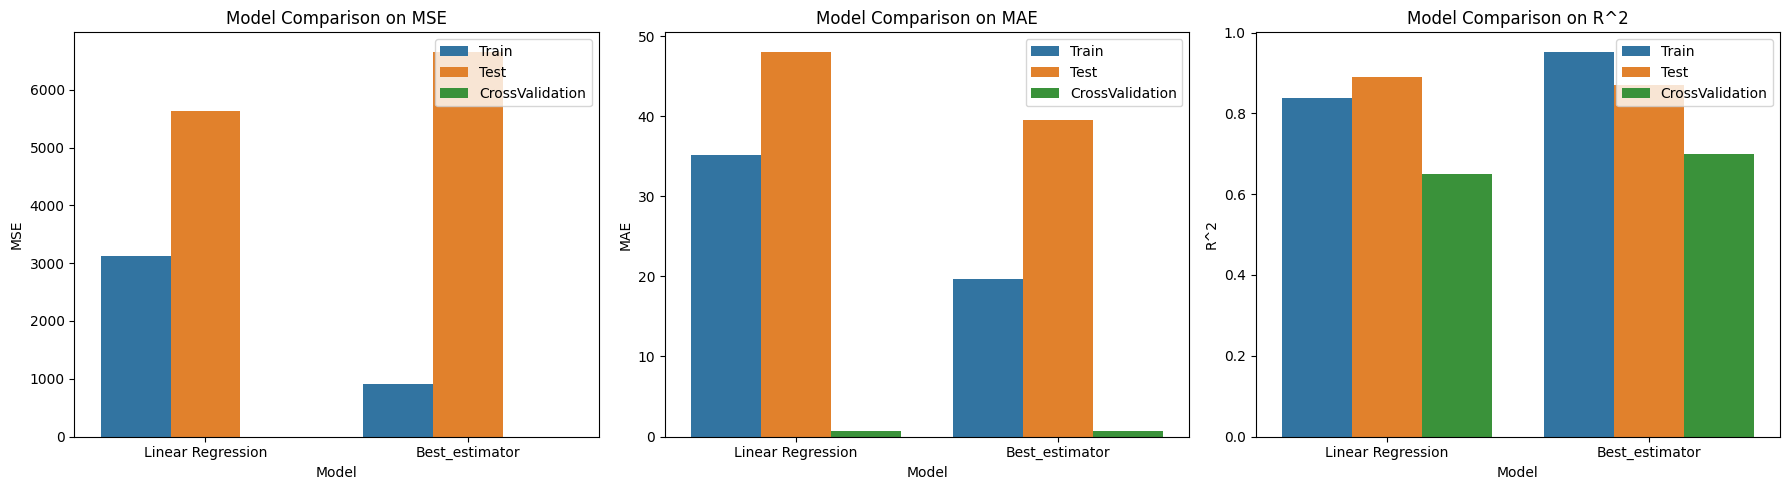

In [14]:
import matplotlib.pyplot as plt

# 성능 지표 저장
results = pd.DataFrame({
    "Model": ["Linear Regression", "Linear Regression", "Best_estimator", "Best_estimator", "Linear Regression", "Best_estimator"],
    "Data": ["Train", "Test", "Train", "Test", "CrossValidation", "CrossValidation"],
    "MSE": [lr_results["Train MSE"], lr_results["Test MSE"], best_model_results["Train MSE"], best_model_results["Test MSE"], lr_results["CV R^2"].mean(), best_model_results["CV R^2"].mean()],
    "MAE": [lr_results["Train MAE"], lr_results["Test MAE"], best_model_results["Train MAE"], best_model_results["Test MAE"], lr_results["CV R^2"].mean(), best_model_results["CV R^2"].mean()],
    "R^2": [lr_results["Train R^2"], lr_results["Test R^2"], best_model_results["Train R^2"], best_model_results["Test R^2"], lr_results["Mean CV R^2"], best_model_results["Mean CV R^2"]]
})

print(results)

# 성능 지표 시각화
metrics = ["MSE", "MAE", "R^2"]

fig, axs = plt.subplots(1, len(metrics), figsize=(18, 5))

for i, metric in enumerate(metrics):
    sns.barplot(x="Model", y=metric, hue="Data", data=results, ax=axs[i])
    axs[i].set_title(f"Model Comparison on {metric}")
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()